In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import ast

In [4]:
hotel_booking_df=pd.read_csv('hotel_booking.csv')

In [6]:
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [7]:
hotel_booking_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [8]:
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# NUMBERS OF ROWS CONTAINS:


In [15]:
print("our dataset have",hotel_booking_df.shape[0],'rows.')

our dataset have 119390 rows.


# NUMBERS OF COLUMN CONTAINS:

In [16]:
print("our dataset have",hotel_booking_df.shape[0],'columns.')

our dataset have 119390 columns.


# CHECK FOR LOST DATA?

In [18]:
count_null=hotel_booking_df.isnull().sum()
for i in range(hotel_booking_df.shape[0]-2):
    if(count_null[i]>0):
        print('yes, we have at least one missing data.')
        break

yes, we have at least one missing data.


# FROM WHICH COUNTRY MORE NUMBERS TRAVELLER COME AND
LISTING FIVE COUNTRIES WITH MOST PASSENGERS:

In [28]:
count_country=hotel_booking_df.groupby(by='country')['name'].count()
count_country=count_country.sort_values(ascending=False)
hotel_booking_df_count_country=pd.DataFrame(count_country)

print("The most travelers come from:\n ",count_country[:1])

print("\nList the 5 countries with the most passengers.\n",count_country[:5])

The most travelers come from:
  country
PRT    48590
Name: name, dtype: int64

List the 5 countries with the most passengers.
 country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: name, dtype: int64


# WHO HAS THE MOST ADR?

In [29]:
ADR=hotel_booking_df.groupby(by='name')['adr'].max()
ADR=ADR.sort_values(ascending=False)
ADR_df = pd.DataFrame(ADR)
print('The most ADR(Average Daily Rate) is:\n',ADR_df.iloc[0])

The most ADR(Average Daily Rate) is:
 adr    5400.0
Name: Daniel Walter, dtype: float64


# CALCULATING THE MEAN OF THE TOTAL ADR?

In [30]:
num_adr=hotel_booking_df['adr'].count()
Avg_adr=hotel_booking_df['adr'].sum()/num_adr

print('Average of total Average Daily Rate is:', Avg_adr.round(decimals=2))

Average of total Average Daily Rate is: 101.83


# CALCULATING THE AVERAGE NUMBER OF NIGHT SPENDITURE:

In [31]:
hotel_booking_df['all_night']= hotel_booking_df.apply(lambda x: x['stays_in_weekend_nights'] + x['stays_in_week_nights'], axis=1)
m = hotel_booking_df['all_night'].mean()
np.round(m,2)

3.43

# WHAT ARE THE MOST COMMON LAST NAME:

In [38]:
hotel_booking_df['last_name'] = hotel_booking_df['name'].apply(lambda x : x[x.index(' ') + 1:])
hotel_booking_df['last_name'].value_counts()[:5]

last_name
Smith       2466
Johnson     1968
Williams    1590
Jones       1420
Brown       1403
Name: count, dtype: int64

# FINDING WHO HAS BOOKED THE HOTEL WITH MOST CHILDRENS OR BABIES:

In [39]:
max_babies=hotel_booking_df['babies'].idxmax()
max_children=hotel_booking_df[ 'children'].idxmax()

print(hotel_booking_df.iloc[max_children]["name"],
      " has booked a hotel with the largest number of children.")

print(hotel_booking_df.iloc[max_babies]["name"],
      " has booked a hotel with the largest number of babies.")

Jamie Ramirez  has booked a hotel with the largest number of children.
Nicholas Parker  has booked a hotel with the largest number of babies.


# SPECIFY THE PHONE CODE OF THE AREAS THA HAVE MOST HOTEL RESERVATIONS:

In [40]:
phone_code=hotel_booking_df['phone-number'].apply(lambda x : x[:3]).value_counts()[:3]

print("3 first codes that have the most hotel reservations :\n", phone_code)

3 first codes that have the most hotel reservations :
 phone-number
799    168
185    167
541    166
Name: count, dtype: int64


In [ ]:
DUPLICATE VALUES:

In [41]:
len(hotel_booking_df[hotel_booking_df.duplicated()])

0

# VISUALIZATION OF DUPLICATE VALUES:

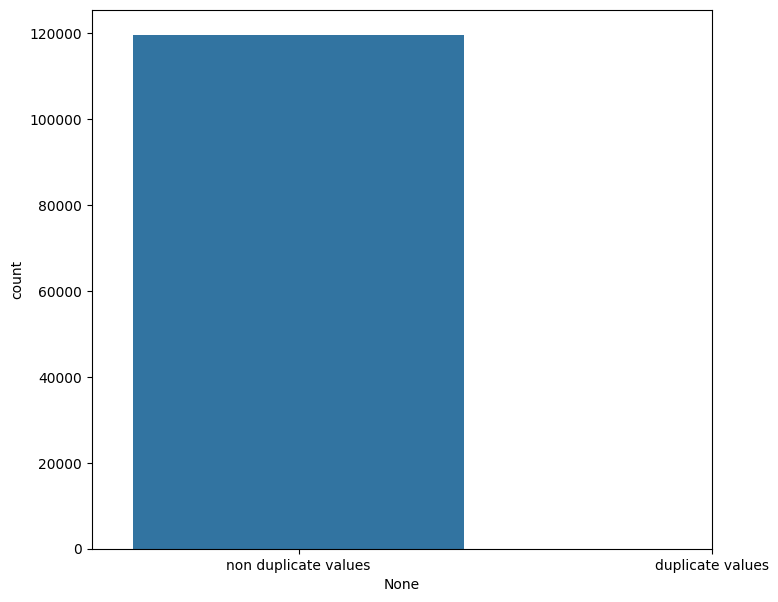

In [43]:
plt.figure(figsize=(8,7))
sns.countplot(x=hotel_booking_df.duplicated())
plt.xticks([0,1],["non duplicate values","duplicate values"],fontsize=10)
plt.show()

# FINDING MISSING VALUES:

In [45]:
hotel_booking_df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
assigned_room_type                     0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
hotel                                  0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
credit_card                            0
all_night                              0
booking_changes                        0
reserved_room_type                     0
is_canceled                            0
stays_in_week_nights                   0
lead_time                              0
arrival_date_yea

# VISUALIZATION OF MISSING VALUES:

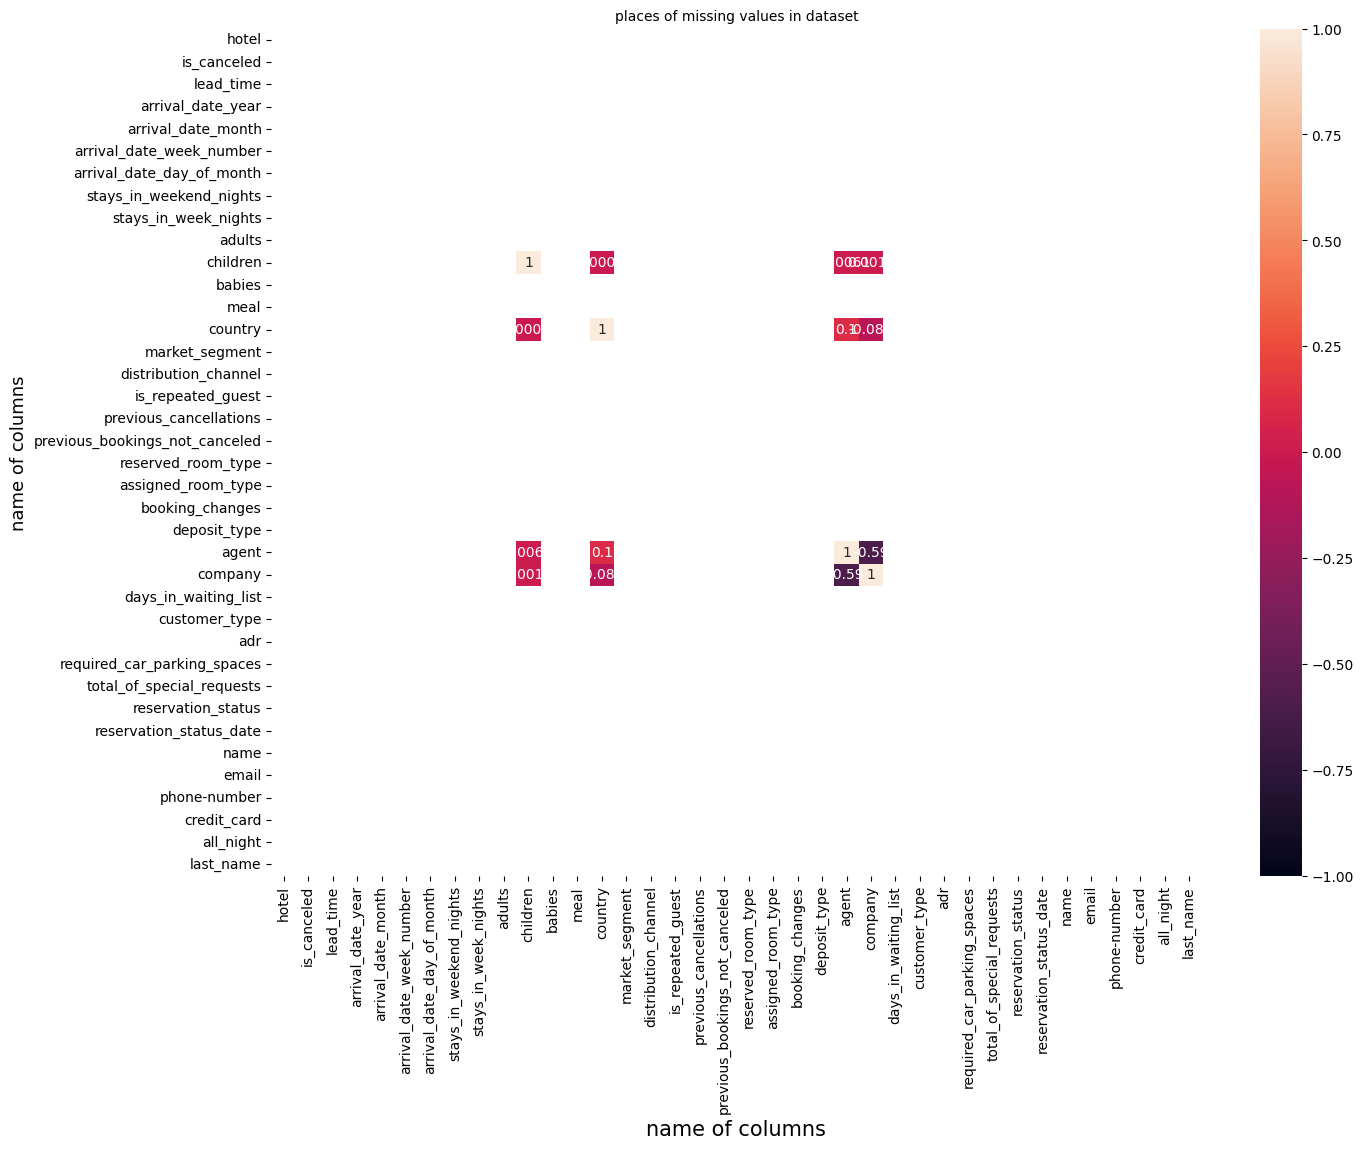

In [47]:
plt.figure(figsize=(15,11))
sns.heatmap(hotel_booking_df.isnull().corr(),vmin=-1,annot=True)

plt.xlabel('name of columns',fontsize=15)
plt.ylabel('name of columns',fontsize=13)
plt.title('places of missing values in dataset',fontsize=10)

plt.show()

# UNDERSTANDING THE VARIABLES:

In [48]:
hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,all_night
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,3.427900
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,2.557439
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000


# CHECKING UNIQUE VALUES IN VARIABLES:

In [49]:
#CHECKING THE  NUMBERS OF UNIQUE VALUES FOR EACH VARIABLLES

for elem in hotel_booking_df.columns:
  print("numbers of unique values in",elem,"column is",hotel_booking_df[elem].nunique())

numbers of unique values in hotel column is 2
numbers of unique values in is_canceled column is 2
numbers of unique values in lead_time column is 479
numbers of unique values in arrival_date_year column is 3
numbers of unique values in arrival_date_month column is 12
numbers of unique values in arrival_date_week_number column is 53
numbers of unique values in arrival_date_day_of_month column is 31
numbers of unique values in stays_in_weekend_nights column is 17
numbers of unique values in stays_in_week_nights column is 35
numbers of unique values in adults column is 14
numbers of unique values in children column is 5
numbers of unique values in babies column is 5
numbers of unique values in meal column is 5
numbers of unique values in country column is 177
numbers of unique values in market_segment column is 8
numbers of unique values in distribution_channel column is 5
numbers of unique values in is_repeated_guest column is 2
numbers of unique values in previous_cancellations column i

In [50]:
#CHECKING UNIQUE VALUES IN HOTEL COLUMN
hotel_booking_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [51]:
#CHECKING UNIQUE VALUES IN IS_CANCELED COLUMN
hotel_booking_df['is_canceled'].unique()

array([0, 1])

In [52]:
#CHECKING UNIQUE VALUES IN LEAD_TIME COLUN
hotel_booking_df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [53]:
#CHECKING UNIQUE VALUES IN ARRIVAL_DATE_YEAR COLUMN
hotel_booking_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [54]:
#CHECKING UNIQUE VALUES IN ARRIVAL_DATE_MONTH COLUMN
hotel_booking_df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [56]:
#CHECKING UNIQUE VALUES IN ARRIVAL_DATE_WEEK_NUMBER COLUMN
hotel_booking_df['arrival_date_week_number'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [57]:
#CHECKING UNIQUE  VALUES IN ARRIVAL_DATE_DAY_OF_MONTH COLUMN
hotel_booking_df['arrival_date_day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [58]:
#CHECKING UNIQUE VALUES IN STAYS_IN_WEEKEND_NIGHTS COLUMN
hotel_booking_df['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

In [59]:
#CHECKING UNIQUE VALUES IN STAYS_IN_WEEK_NIGHTS COLUMN
hotel_booking_df['stays_in_week_nights'].unique()

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

In [60]:
#CHECKING UNIQUE VALUES IN ADULTS COLUMN
hotel_booking_df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [61]:
#CHECKING UNIQUE VALUES IN CHILDREN COLUMN
hotel_booking_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [62]:
#CHECKING UNIQUE VALUES IN BABIES COLUMN
hotel_booking_df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [63]:
#CHECKING UNIQUE  VALUES IN MEAL COLUMN
hotel_booking_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [64]:
#CHECKING UNIQUE VALUES IN COUNTRY COLUMN
hotel_booking_df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [65]:
#CHECKING UNIQUE VALUES IN MARKET_SEGMENT COLUMN
hotel_booking_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [66]:
#CHECKING UNIQUE VALUES IN DISTRIBUTION_CHANNEL COLUMN
hotel_booking_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [67]:
#CHECKING UNIQUE VALUES IN IS_REPEATED_GUEST COLUMN
hotel_booking_df['is_repeated_guest'].unique()

array([0, 1])

In [68]:
#CHECKING UNIQUE VALUES IN RESERVED_ROOM_TYPE COLUMN
hotel_booking_df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [69]:
#CHECKING UNIQUE VALUES IN ASSIGNED_ROOM_TYPE COLUMN
hotel_booking_df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [70]:
#CHECKING UNIQUE VALUES IN BOOKING_CHANGES COLUMN
hotel_booking_df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [72]:
#CHECKING UNIQUE VALUES IN DEPOSIT_TYPE COLUMN
hotel_booking_df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [73]:
#CHECKING UNIQUE VALUES IN AGENT COLUMN
hotel_booking_df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [74]:
#CHECKING UNIQUE VALUES IN COMPANY COLUMN
hotel_booking_df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [75]:
#CHECKING UNIQUE VALUES IN DAYS_IN_WAITING_LIST COLUMN
hotel_booking_df['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36])

In [76]:
#CHECKING UNIQUE VALUES IN CUSTOMER_TYPE COLUMN
hotel_booking_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [79]:
#CHECKING UNIQUE VALUES IN REQUIRED_CAR_PARKING_SPACES COLUMN
hotel_booking_df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [80]:
#CHECKING UNIQUE VALUES IN RESERVATION_STATUS COLUMN
hotel_booking_df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [81]:
#CHECKING UNIQUE VALUES IN RESERVATION_STATUS_DATE COLUMN
hotel_booking_df['reservation_status_date'].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

In [82]:
#CHECKING FINAL NUMBERS OF ROWWWWS ANND COLUMN
hotel_booking_df.shape

(119390, 38)

# DATA VISUALISATION,STORYTELLING AND EXPERIMENTING WITH CHARTS

# CHART1: PIE CHAT FOR MOST PREFERRED HOTEL

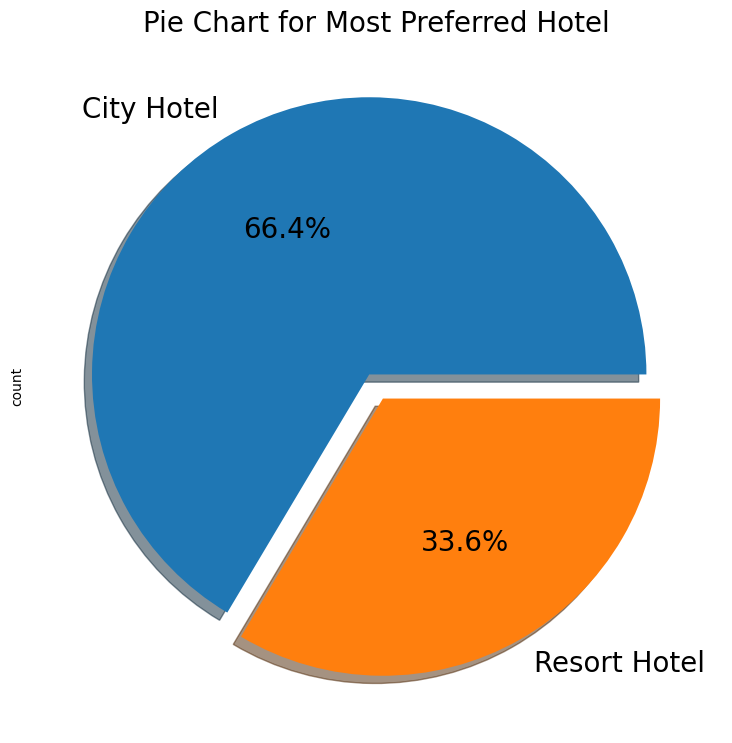

In [83]:
# Visualizing by pie chart
hotel_booking_df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct ='%1.1f%%', shadow = True, figsize =(10,9), fontsize = 20)

# Set labels
plt.title('Pie Chart for Most Preferred Hotel', fontsize = 20)

# To show
plt.show()

# CHART-2: HOTEL TYPE WITH HIGHEST ADR(BIVARIATE WITH CATEGOTICAL-NUMERICAL)

<ipython-input-84-96636897a9ff>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['City Hotel', 'Resort Hotel'], fontsize = 16)


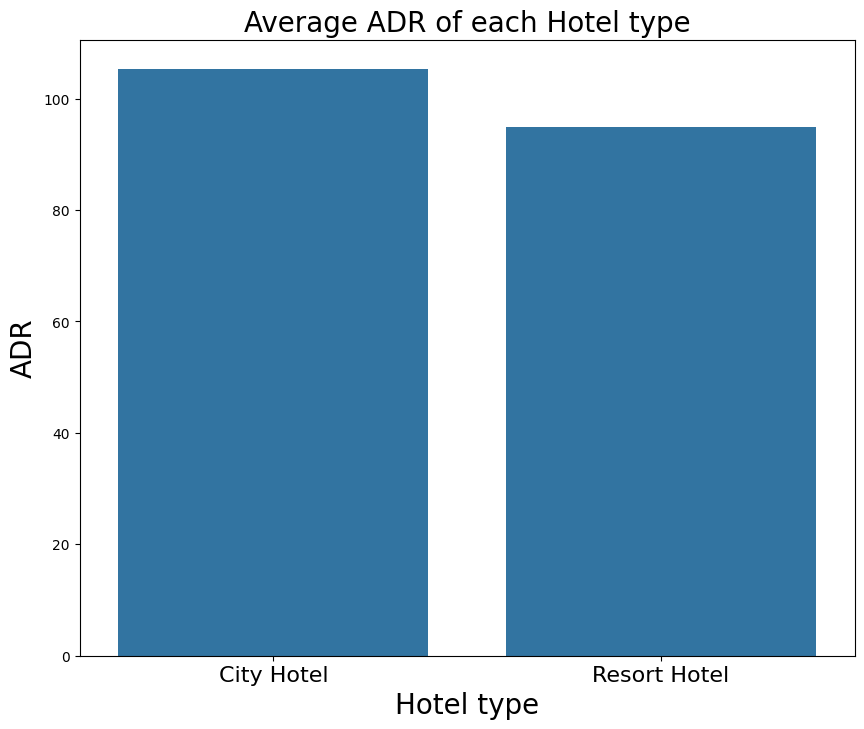

In [84]:
# Group by Hotel
group_by_hotel = hotel_booking_df.groupby('hotel')

# Grouping by Hotel adr
highest_adr = group_by_hotel['adr'].mean().reset_index()

# Set plot size
plt.figure(figsize = (10,8))

# Create the figure object
ax = sns.barplot(x= highest_adr['hotel'], y= highest_adr['adr'])

# Set labels
ax.set_xlabel("Hotel type", fontsize = 20)
ax.set_ylabel("ADR", fontsize = 20)
ax.set_xticklabels(['City Hotel', 'Resort Hotel'], fontsize = 16)
ax.set_title('Average ADR of each Hotel type', fontsize = 20)

# To show
plt.show(ax)


# CHART-3: PERCENTAGE OF REPEATED GUESTS

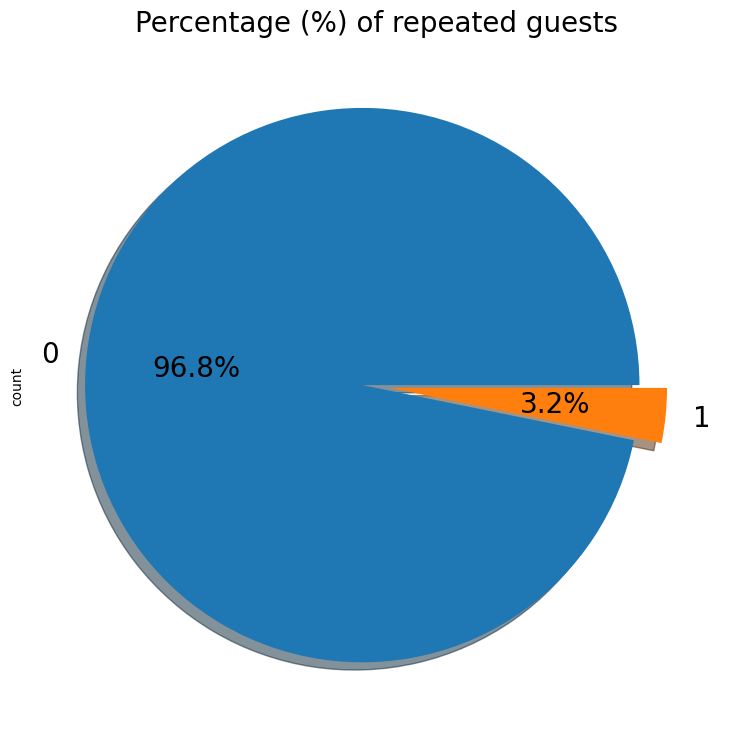

In [90]:
# Visualizing by pie chart
hotel_booking_df['is_repeated_guest'].value_counts().plot.pie(explode=[0.05, 0.05], autopct ='%1.1f%%', shadow = True, figsize =(10,9), fontsize = 20)

# Set labels
plt.title('Percentage (%) of repeated guests', fontsize = 20)

# To show
plt.show()

# CHART-4: PERCENTAGE DISTRIBUTION OF REQUIRED CAR PARKING SPACES

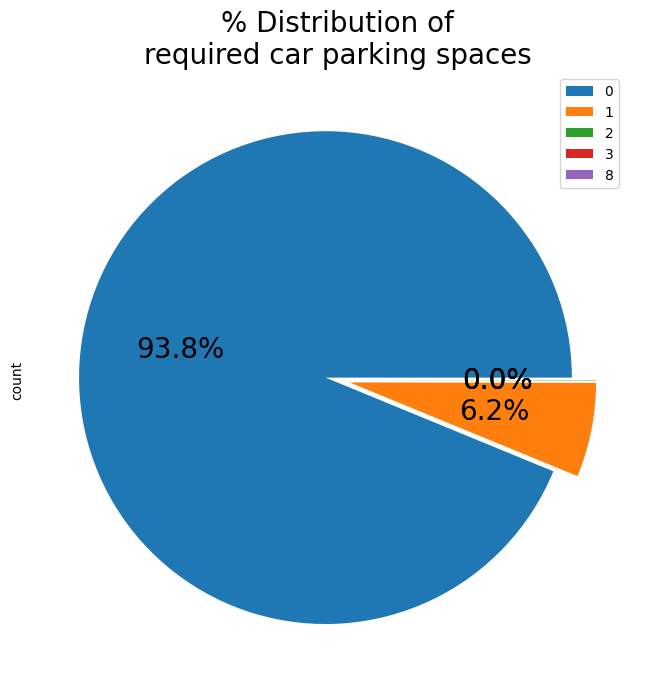

In [91]:
# Visualizing by pie chart
hotel_booking_df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct ='%1.1f%%', shadow = False, figsize =(12,8), fontsize = 20, labels = None)

# Create the figure object
labels = hotel_booking_df['required_car_parking_spaces'].value_counts().index

# Set labels
plt.title('% Distribution of\nrequired car parking spaces', fontsize = 20)
plt.legend(bbox_to_anchor = (0.85, 1), loc = 'upper left', labels = labels)

# To show
plt.show()

# CHART-5: MEAL TYPE DISTRIBUTION

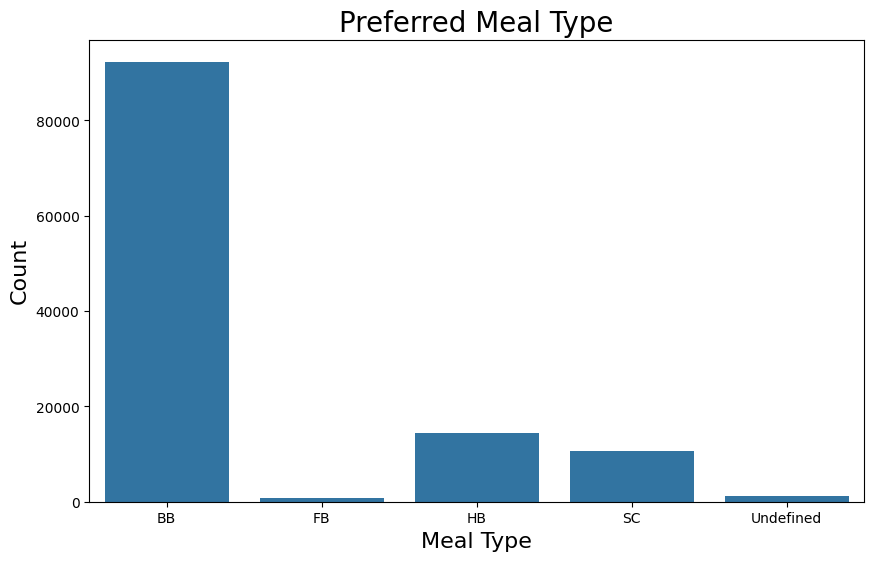

In [92]:
# Set plot size
plt.figure(figsize=(10,6))

# Create the figure object
sns.countplot(x = hotel_booking_df['meal'])

# Set labels
plt.xlabel('Meal Type', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Preferred Meal Type', fontsize = 20)

# To show
plt.show()

# CHART-6: PIE CHART FOR MOSTLY USED DISTRIBUTION CHANNEL AND BAR PLOT FOR RELATIONSHIP OF DISTRIBUTION  CHANNEL AND ADR

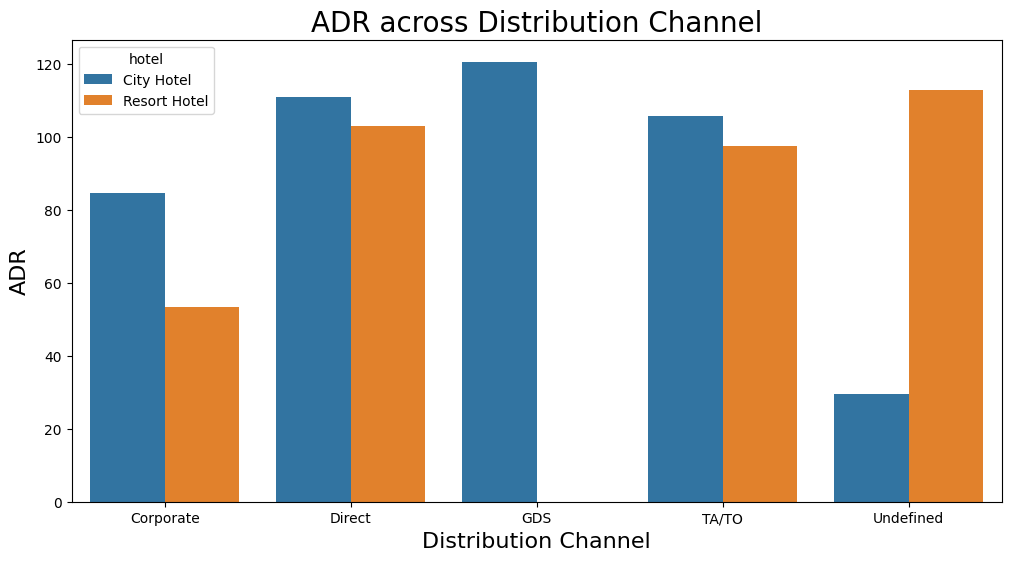

In [96]:
# Visualizing with the help of bar plot for checking relationship between ADR and distribution channel
# Using group by on distribution channel and hotel
distribution_channel_df = hotel_booking_df.groupby(['distribution_channel', 'hotel'])['adr'].mean().reset_index()

# Set plot size
plt.figure(figsize = (12,6))

# Plotting the bar chart
sns.barplot(x = 'distribution_channel', y = 'adr', data = distribution_channel_df, hue = 'hotel')

# Set labels
plt.xlabel("Distribution Channel", fontsize = 16)
plt.ylabel("ADR", fontsize = 16)
plt.title('ADR across Distribution Channel', fontsize = 20)

# To show
plt.show()

# CHART-7: BOOKING BY MONTH AND OPTIMAL STAY LENGTH IN HOTELS

In [97]:
# Using groupby on arrival_date_month and taking the hotel count
bookings_by_months_df = hotel_booking_df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns = {'hotel':'Counts'})

# Creating list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating dataframe which will map the order of above months list without changing its values
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'], categories = months, ordered = True)

# Sorting by arrival_date_month
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,5929
3,February,8068
7,March,9794
0,April,11089
8,May,11791
6,June,10939
5,July,12661
1,August,13877
11,September,10508
10,October,11160


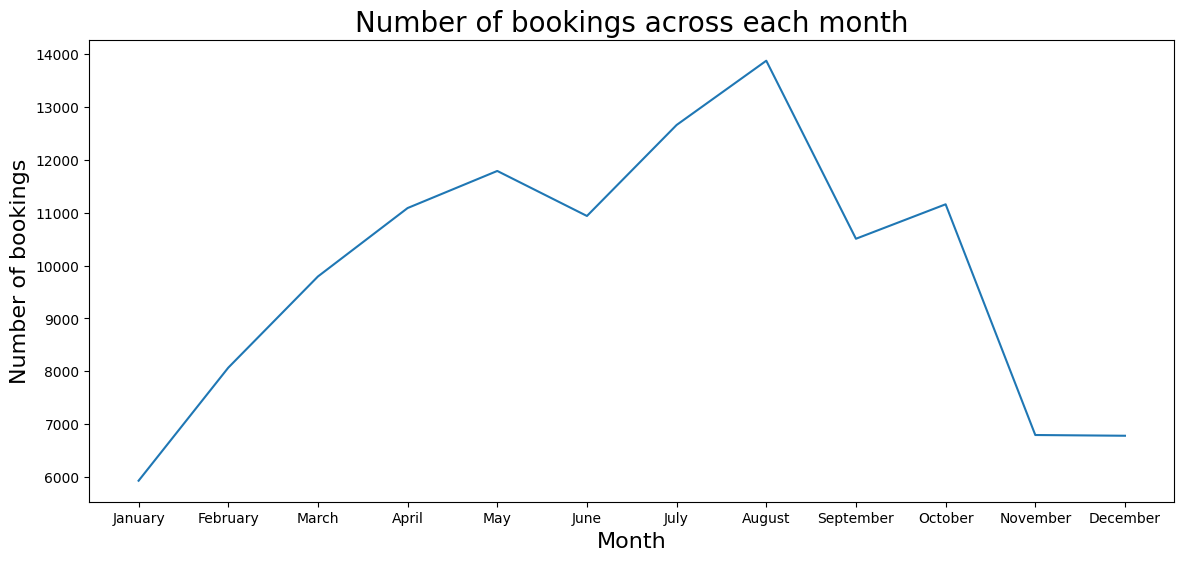

In [98]:
# Set plot size
plt.figure(figsize = (14,6))

# Plotting lineplot on x- months & y- bookings counts
sns.lineplot(x = bookings_by_months_df['arrival_date_month'], y = bookings_by_months_df['Counts'])

# Set title
plt.title('Number of bookings across each month', fontsize = 20)

# Set labels
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of bookings', fontsize = 16)

# To show
plt.show()

# CHART-8: PLOTTING HISTOGRAM

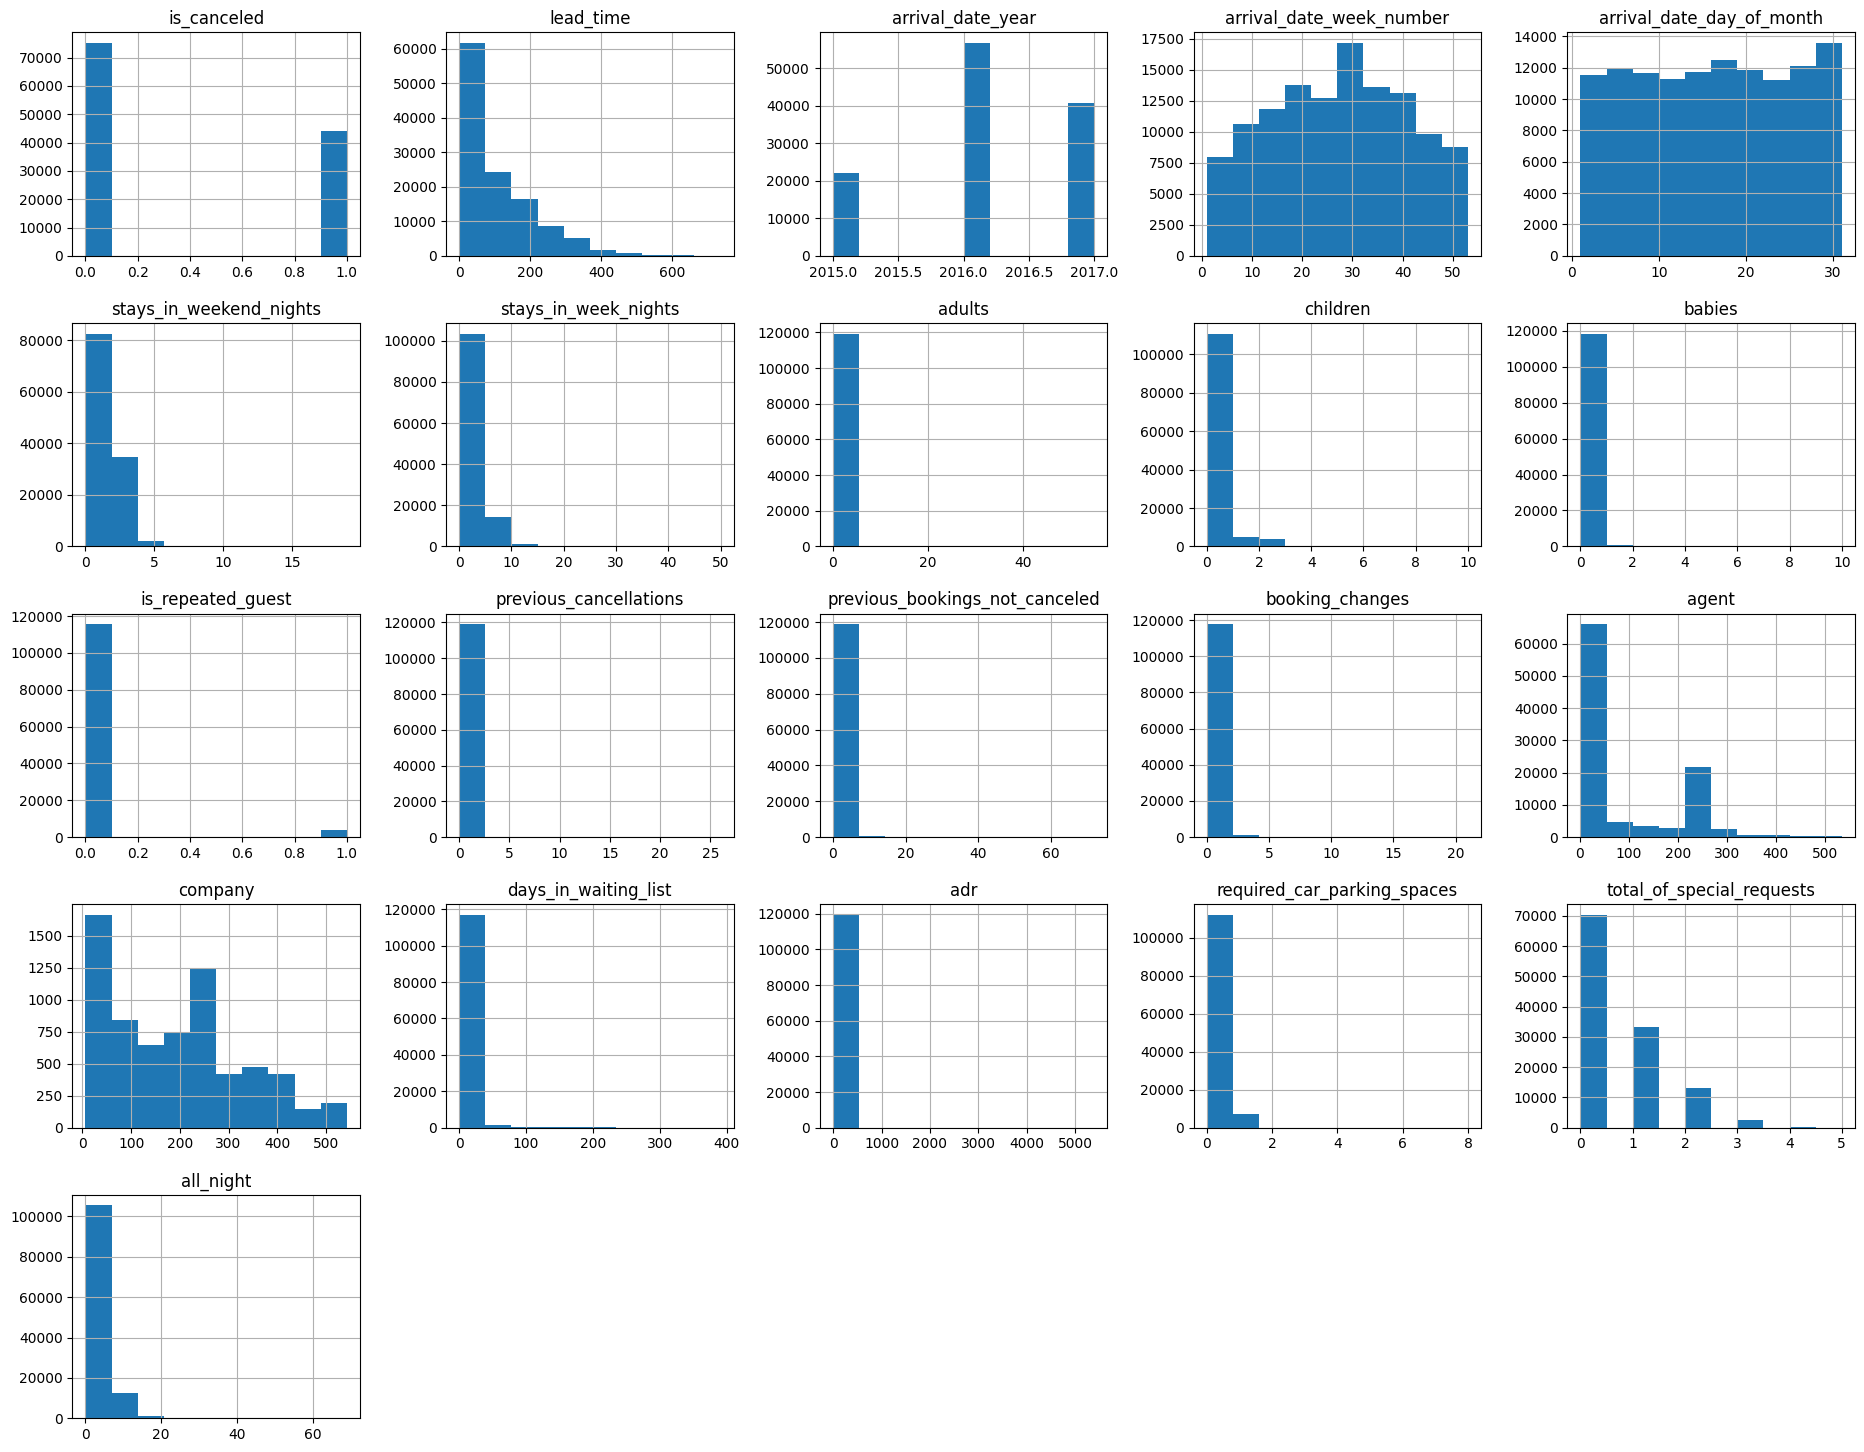

In [101]:
hotel_booking_df.hist(figsize = (23,18))

# To show
plt.show()

# CHART-9: YEAR AND HOTEL WISE CONFIRMED BOOKING AND CANCELLETION DISTRIBUTION

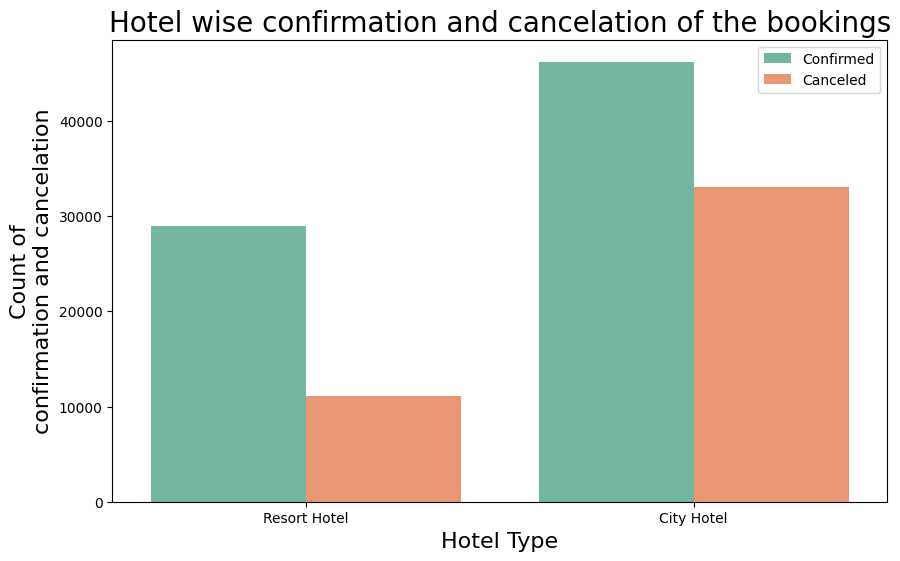

In [102]:
# Set plot size
plt.figure(figsize = (10,6))

# Create the figure object
sns.countplot(x = 'hotel', hue = 'is_canceled', palette = 'Set2', data = hotel_booking_df)

# Set legends
plt.legend(['Confirmed', 'Canceled'])

# Set labels
plt.title('Hotel wise confirmation and cancelation of the bookings', fontsize = 20)
plt.ylabel('Count of\nconfirmation and cancelation', fontsize = 16)
plt.xlabel('Hotel Type', fontsize = 16)

# To show
plt.show()

is_canceled
0    28938
1    11122
Name: count, dtype: int64

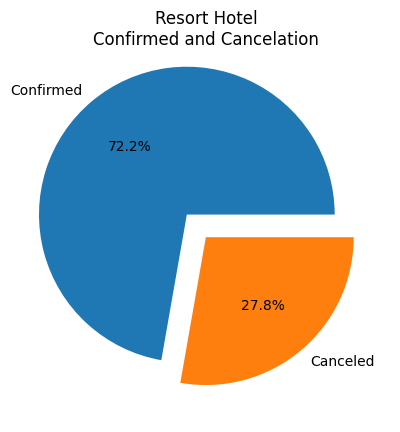

In [103]:
# Plotting a Pie chart using matplotlib for percentage of confirmed and canceled bookings of Resort Hotel
resort_hotel = hotel_booking_df.loc[(hotel_booking_df['hotel'] == 'Resort Hotel')]
resort_hotel_checking_cancel = resort_hotel['is_canceled'].value_counts()

# Set labels
mylabels = ['Confirmed', 'Canceled']

# Set figure size
myexplode = [0.2, 0]

# Create the figure object
resort_hotel_cancelation = plt.pie(resort_hotel_checking_cancel, labels = mylabels, explode = myexplode, autopct = '%1.1f%%')

# Set title
plt.title('Resort Hotel\nConfirmed and Cancelation')

resort_hotel_checking_cancel

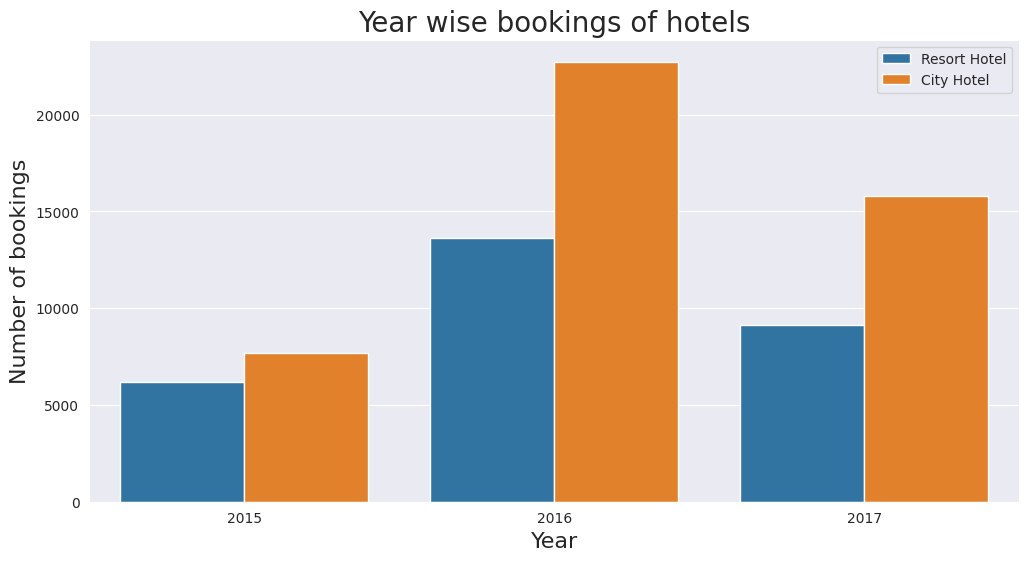

In [104]:
# Removing the canceled bookings from the data and creating a new dataframe
data_not_canceled = hotel_booking_df[hotel_booking_df['is_canceled'] == 0]

# Year wise Bookings of hotels
# Set style
sns.set_style(style = 'darkgrid')

# Set plot size
plt.figure(figsize = (12,6))

# Create the figure object
sns.countplot(x= 'arrival_date_year', hue= 'hotel', palette = 'tab10', data = data_not_canceled)

# Set legends
plt.legend(['Resort Hotel', 'City Hotel'])

# Set labels
plt.title('Year wise bookings of hotels', fontsize = 20)
plt.ylabel('Number of bookings', fontsize = 16)
plt.xlabel('Year', fontsize = 16)

# To show
plt.show()

# CHART-10: ADR ACROSS DIFFERENT MONTHS

In [105]:
# Using groupby funtion
bookings_by_months_df = hotel_booking_df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# It will take the order of the month list in the dataframe along with values
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'], categories = months, ordered = True)

# Sorting values
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,82.628986
9,January,Resort Hotel,49.461883
6,February,City Hotel,85.088278
7,February,Resort Hotel,55.171930
15,March,Resort Hotel,57.520147
14,March,City Hotel,92.643116
0,April,City Hotel,111.251838
1,April,Resort Hotel,77.849496
17,May,Resort Hotel,78.758134
16,May,City Hotel,121.638560


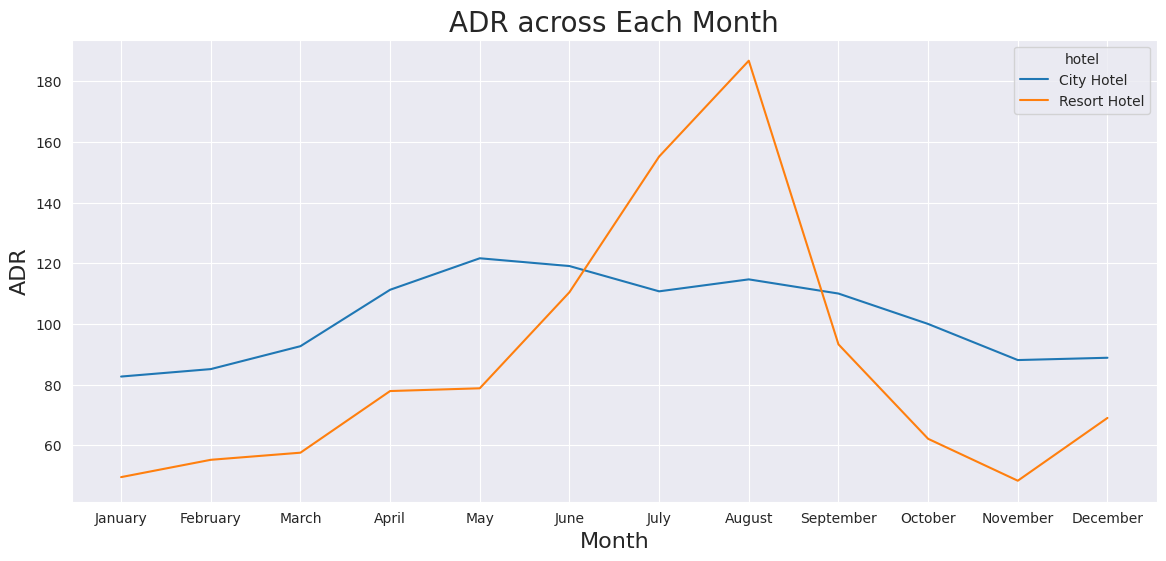

In [106]:
# Visualizing with the help of line plot

# Set plot size
plt.figure(figsize = (14,6))

# Create the figure object and plotting the line
sns.lineplot(x = bookings_by_months_df['arrival_date_month'], y = bookings_by_months_df['adr'], hue = bookings_by_months_df['hotel'])

# Set labels
plt.title('ADR across Each Month', fontsize = 20)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('ADR', fontsize = 16)

# To show
plt.show()

# CHART-11: WEEKLY STAY DISTRIBUTION AND CALCULATION OF CANCELLETION AND NON-CANCELLATION

<ipython-input-107-714aeee34269>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'arrival_date_week_number', y = 'total_stay', palette = 'Set2', data = hotel_booking_df)


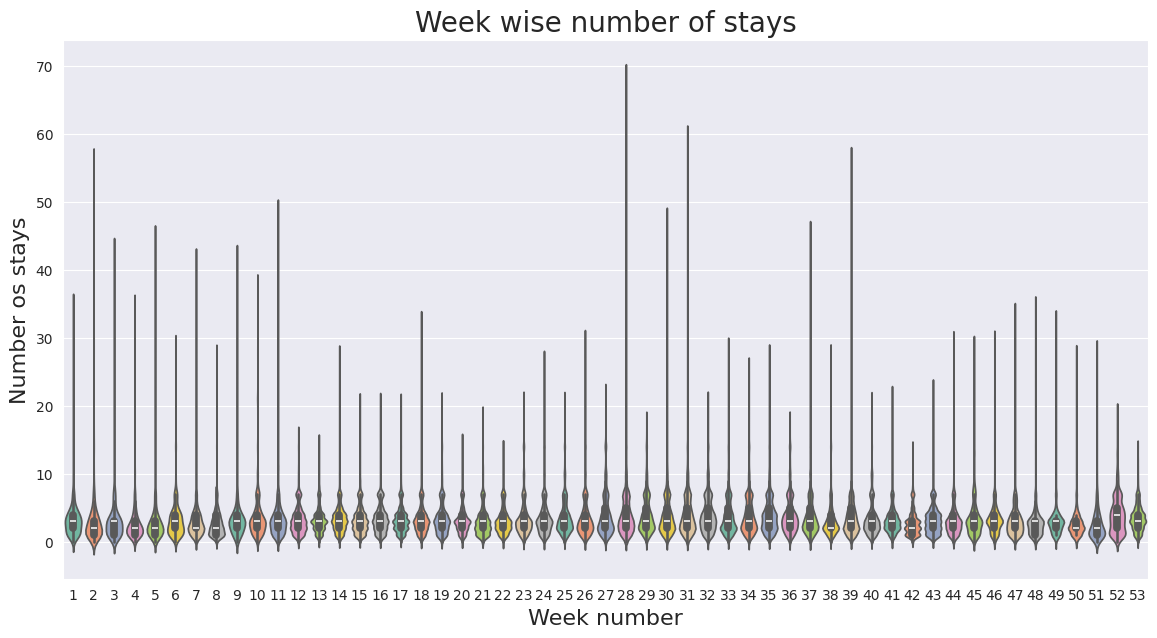

In [107]:
# Chart - 12 visualization code
# As i have already created a column 'total_stay' above i.e.
# Adding total staying days in hotels
hotel_booking_df['total_stay'] = hotel_booking_df['stays_in_weekend_nights'] + hotel_booking_df['stays_in_week_nights']

# Set the plot size
plt.figure(figsize=(14,7))

# Using a violin plot to know in which weeks, visitors stays the most
sns.violinplot(x = 'arrival_date_week_number', y = 'total_stay', palette = 'Set2', data = hotel_booking_df)

# Set labels
plt.title('Week wise number of stays', fontsize = 20)
plt.ylabel('Number os stays', fontsize = 16)
plt.xlabel('Week number', fontsize = 16)

# To show
plt.show()

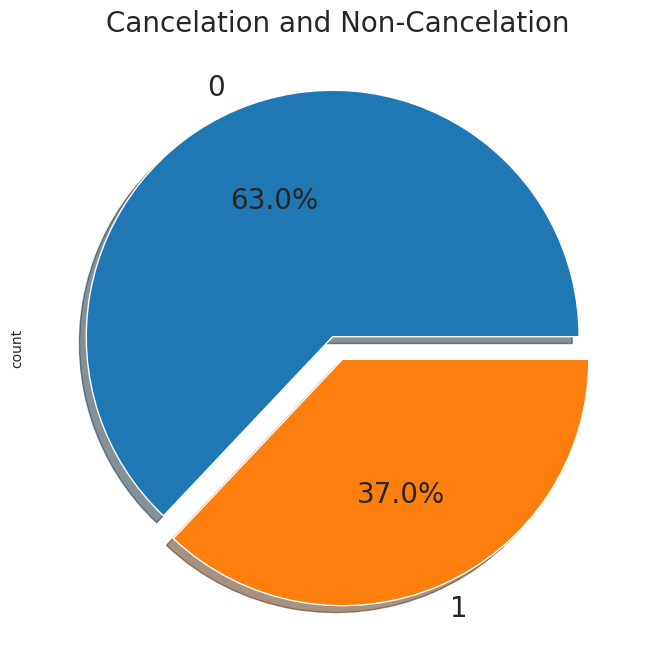

In [108]:
# Visualizing with the help of pie plot
hotel_booking_df['is_canceled'].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%', shadow = True, figsize = (10,8), fontsize = 20)

# Set title
plt.title('Cancelation and Non-Cancelation', fontsize = 20)

# To show
plt.show()

# CHART-12: ROOM TYPE PREFFERENCE AND CUSTOMER TYPE



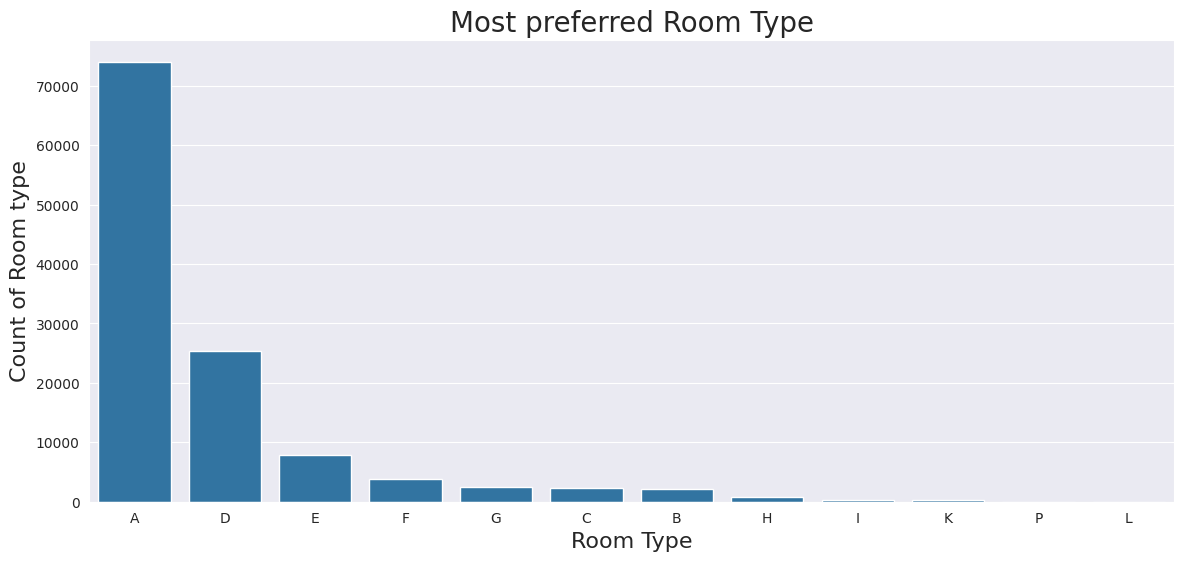

In [110]:
# Set the plot size
plt.figure(figsize = (14,6))

# Create the figure object
sns.countplot(x = hotel_booking_df['assigned_room_type'], order = hotel_booking_df['assigned_room_type'].value_counts().index)

# Set labels
plt.xlabel('Room Type', fontsize = 16)
plt.ylabel('Count of Room type', fontsize = 16)
plt.title('Most preferred Room Type', fontsize = 20)

# To show
plt.show()

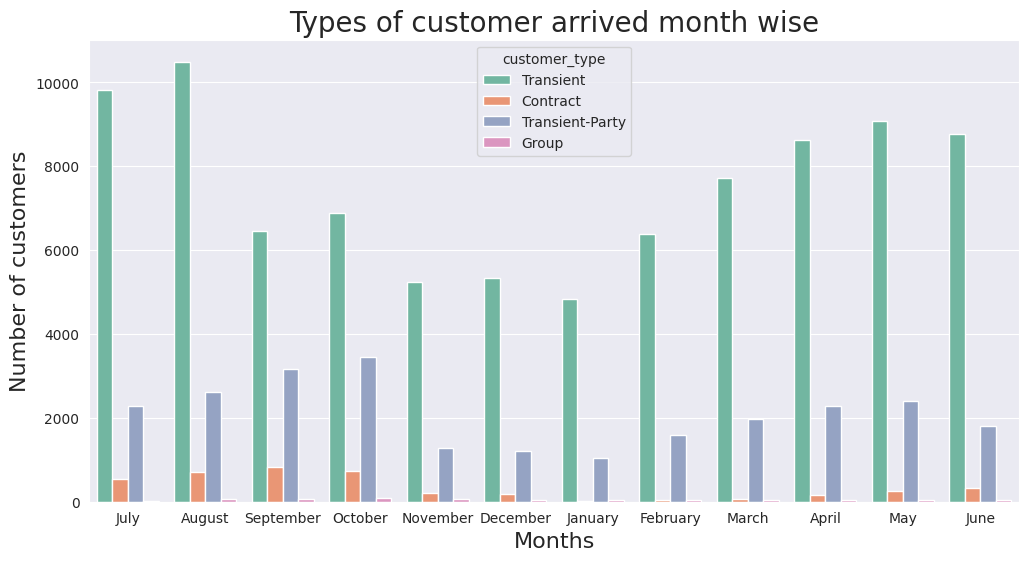

In [111]:
# Using seeborn to plot a count plot chart to demonstrate the types of customer visit the most
# Set the plot size
plt.figure(figsize = (12,6))

# Create the figure object
sns.countplot(x = 'arrival_date_month', hue = 'customer_type', palette = 'Set2', data = hotel_booking_df)

# Set labels
plt.xlabel('Months', fontsize = 16)
plt.ylabel('Number of customers', fontsize = 16)
plt.title('Types of customer arrived month wise', fontsize = 20)

# To show
plt.show()